In [2]:
import tifffile as tff
import matplotlib.pyplot as plt
from scipy import ndimage

%matplotlib widget

In [3]:
bilde0 = tff.imread("eks/bilde0.tif")
bilde1 = tff.imread("eks/bilde1.tif")
bilde2 = tff.imread("eks/bilde2.tif")

In [4]:
def get_skala(filename: str):
    tif0 = tff.TiffFile(filename)
    return tif0.fei_metadata["EScan"]["PixelWidth"]

(600, 1800)
(600, 1800)
(600, 1800)


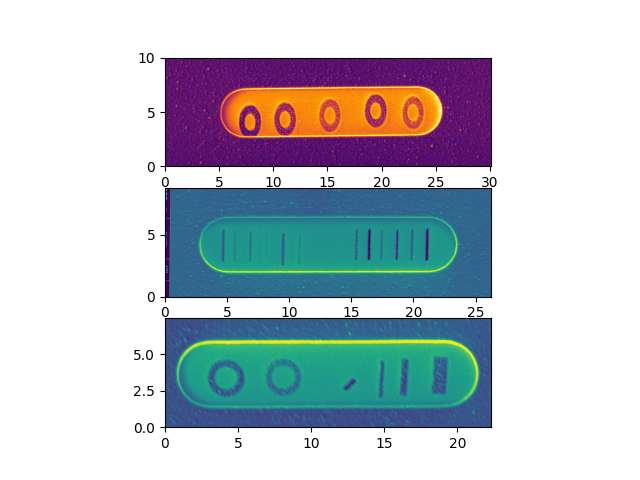

In [52]:
try:
    plt.close(fig)
except:
    pass

bilde0_cropped = bilde0[725:1325,100:1900]
print(bilde0_cropped.shape)

bilde1_rotated = ndimage.rotate(bilde1, -90.5)
bilde1_cropped = bilde1_rotated[700:1300, 100:1900]
print(bilde1_cropped.shape)

bilde2_rotated = ndimage.rotate(bilde2, 45)
bilde2_cropped = bilde2_rotated[1000:1600, 500:2300]
print(bilde2_cropped.shape)

bilde0_fin = bilde0_cropped
bilde1_fin = bilde1_cropped
bilde2_fin = bilde2_cropped

skala0 = get_skala("eks/bilde0.tif")
skala1 = get_skala("eks/bilde1.tif")
skala2 = get_skala("eks/bilde2.tif")

extent0 = [0, skala0 * bilde0_fin.shape[1] * 10**6, 0, skala0 * bilde0_fin.shape[0] * 10**6]
extent1 = [0, skala1 * bilde1_fin.shape[1] * 10**6, 0, skala1 * bilde1_fin.shape[0] * 10**6]
extent2 = [0, skala2 * bilde2_fin.shape[1] * 10**6, 0, skala2 * bilde2_fin.shape[0] * 10**6]

fig, axs = plt.subplots(3, 1)
axs[0].imshow(bilde0_fin, extent=extent0)
axs[1].imshow(bilde1_fin, extent=extent1)
axs[2].imshow(bilde2_fin, extent=extent2)

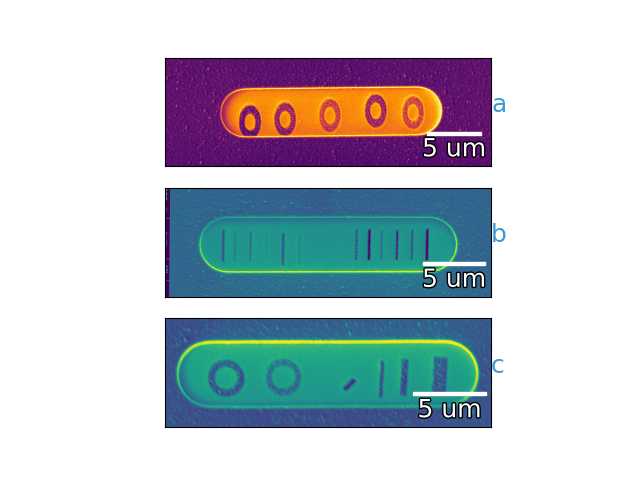

In [53]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import matplotlib.patheffects as patheffects
fontprops = fm.FontProperties(size=18)

scalebar_kwargs = {'size': 5, 'label': '5 um', 'loc': 4, 'frameon': False, 'color': 'white', 'size_vertical': 0.2, 'label_top': False, 'fontproperties': fontprops}

def add_scalebar(ax: plt.Axes): 
    scalebar = AnchoredSizeBar(transform=ax.transData, **scalebar_kwargs)
    # Denne legger til et svart omriss rundt scalebar teksten, for å gjøre den lettere å lese
    scalebar.txt_label._text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black', capstyle="round")])
    ax.add_artist(scalebar)

for ax in axs:
    add_scalebar(ax)
    ax.set_xticks([])
    ax.set_yticks([])

axs[0].annotate("a", xy=(1, 0.5),  xycoords="axes fraction", fontsize=18, color="#399ad5")
axs[1].annotate("b", xy=(1, 0.5),  xycoords="axes fraction", fontsize=18, color="#399ad5")
axs[2].annotate("c", xy=(1, 0.5),  xycoords="axes fraction", fontsize=18, color="#399ad5")


fig.show()
fig.savefig("eks/figur.jpg", dpi=300, bbox_inches="tight")